In [9]:
import pandas as pd
#Load the dataset
from google.colab import files
# file = files.upload()  #upload file into google colab session
df1 = pd.read_csv("/content/diabetic_data.csv") 
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
import pandas as pd
#Load the dataset
from google.colab import files
# file = files.upload()  #upload file into google colab session
df2 = pd.read_csv("/content/US healthcare data.csv") 
df2.head()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,repaglinide,glipizide,insulin,count_No,count_Steady,count_Down,count_Up,change,diabetesMed,readmitted
0,1,Emergency,Discharged to home,Referral,1,41,0,1,0,0,...,No,No,No,4,0,0,0,No,No,NO
1,2,Emergency,Discharged to home,Emergency Room,3,59,0,18,0,0,...,No,No,Up,3,0,0,1,Ch,Yes,NO
2,3,Emergency,Discharged to home,Emergency Room,2,11,5,13,2,0,...,No,Steady,No,3,1,0,0,No,Yes,NO
3,4,Emergency,Discharged to home,Emergency Room,2,44,1,16,0,0,...,No,No,Up,3,0,0,1,Ch,Yes,NO
4,5,Emergency,Discharged to home,Emergency Room,1,51,0,8,0,0,...,No,Steady,Steady,2,2,0,0,Ch,Yes,NO


In [4]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings("ignore")

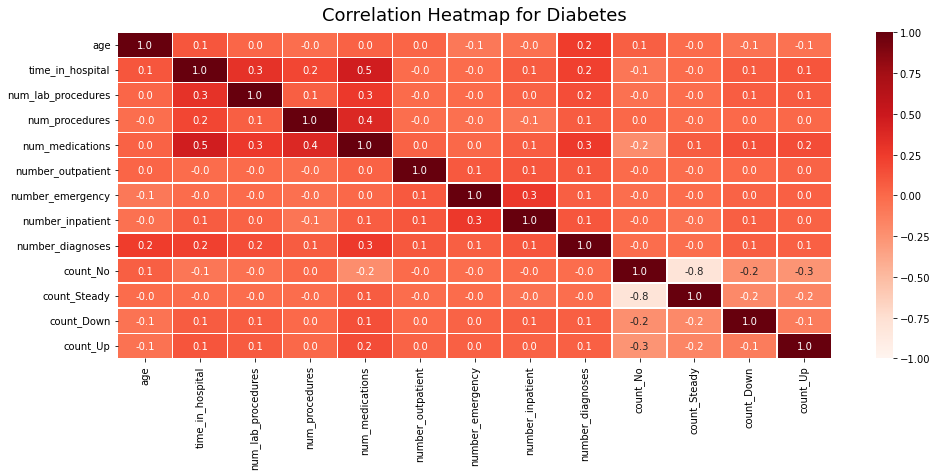

In [5]:
import plotly.express as px
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df2.corr(),linewidths=.5,annot=True, fmt=".1f", cmap="Reds",vmin=-1, vmax=1);
heatmap.set_title('Correlation Heatmap for Diabetes', fontdict={'fontsize':18}, pad=12);

In [10]:
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

df1['age'] = df1['age'].apply(lambda x : replaceDict[x])
print(df1['age'].head())

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


In [11]:
df1.dropna(inplace = True)
print('Total data = ', len(df1))
print('Unique entries = ', len(np.unique(df1['patient_nbr'])))
df1.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(df1))

Total data =  101766
Unique entries =  71518
Length after removing Duplicates: 71518


In [12]:
df1.isnull().sum().sort_values(ascending=False) #checking missing data

encounter_id                0
troglitazone                0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
tolazamide                  0
patient_nbr                 0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
nateglinide                 0
repaglinide                 0
metformin                   0
A1Cresult                   0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_

In [13]:
df = df1.replace('?',np.nan)

In [14]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [15]:
df1.isnull().sum().sort_values(ascending=False) #checking missing data

encounter_id                0
troglitazone                0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
tolazamide                  0
patient_nbr                 0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
nateglinide                 0
repaglinide                 0
metformin                   0
A1Cresult                   0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_

In [16]:
diag_1 = Counter(list(df1['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(df1['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(df1['diag_3'])).most_common(1)[0][0]
df1['diag_1'] = df1['diag_1'].apply(lambda x : diag_1 if x == '?' else x)
df1['diag_2'] = df1['diag_1'].apply(lambda x : diag_2 if x == '?' else x)
df1['diag_3'] = df1['diag_3'].apply(lambda x : diag_3 if x == '?' else x)

In [17]:
print(diag_1)

414


In [18]:
df1.to_csv('df1.csv')

In [19]:
df1["AGE"] = " "

In [20]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AGE
0,2278392,8222157,Caucasian,Female,5,?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,
1,149190,55629189,Caucasian,Female,15,?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,
2,64410,86047875,AfricanAmerican,Female,25,?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,
3,500364,82442376,Caucasian,Male,35,?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,
4,16680,42519267,Caucasian,Male,45,?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,


In [21]:
age_id = {5: '[0-10)', 
          15:'[10-20)', 
          25:'[20-30)', 
          35:'[30-40)', 
          45:'[40-50)', 
          55:'[50-60)',
          65:'[60-70)', 
          75:'[70-80)', 
          85:'[80-90)', 
          95:'[90-100)'}
df1['AGE'] = df1.age.replace(age_id)

In [22]:
df = df1.replace('?',np.nan)

In [23]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AGE
0,2278392,8222157,Caucasian,Female,5,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,[0-10)
1,149190,55629189,Caucasian,Female,15,NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,[10-20)
2,64410,86047875,AfricanAmerican,Female,25,NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,[20-30)
3,500364,82442376,Caucasian,Male,35,NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,[30-40)
4,16680,42519267,Caucasian,Male,45,NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,[40-50)


In [24]:

df['diag_1'] = df['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [25]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AGE
0,2278392,8222157,Caucasian,Female,5,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,[0-10)
1,149190,55629189,Caucasian,Female,15,NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,[10-20)
2,64410,86047875,AfricanAmerican,Female,25,NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,[20-30)
3,500364,82442376,Caucasian,Male,35,NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,[30-40)
4,16680,42519267,Caucasian,Male,45,NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,[40-50)


In [26]:
df.diag_1.unique()

array(['diabetes', 'other', 'pregnecy', 'neoplasms', 'circulatory',
       'respiratory', 'injury', 'musculoskeletal', 'digestive',
       'genitourinary'], dtype=object)

In [27]:
df.diag_2.unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '564', '812',
       '38', '590', '556', '578', '250.32', '433', 'V58', '569', '185',
       '536', '255', '250.13', '599', '558', '574', '491', '560', '244',
       '250.03', '577', '730', '188', '824', '250.8', '332', '562', '291',
       '296', '510', '401', '263', '438', '70', '250.02', '493', '642',
       '625', '571', '738', '593', '250.42', '807', '456', '446', '575',
       '250.41', '820', '515', '780', '250.22', '995', '235', '250.82',
       '721', '787', '162', '724', '282', '514', 'V55', '281', '250.33',
       '466', '435', '250.12', 'V53', '789', '566', '822', '

In [28]:
df['diag_2'] = df['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [29]:
df['diag_3'] = df['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [30]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AGE
0,2278392,8222157,Caucasian,Female,5,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,[0-10)
1,149190,55629189,Caucasian,Female,15,NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,[10-20)
2,64410,86047875,AfricanAmerican,Female,25,NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,[20-30)
3,500364,82442376,Caucasian,Male,35,NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,[30-40)
4,16680,42519267,Caucasian,Male,45,NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,[40-50)


In [31]:
df.diag_2.unique()

array(['diabetes', 'other', 'pregnecy', 'neoplasms', 'circulatory',
       'respiratory', 'injury', 'musculoskeletal', 'digestive',
       'genitourinary'], dtype=object)

In [32]:
df.diag_3.unique()

array(['diabetes', 'other', 'circulatory', 'respiratory', 'injury',
       'neoplasms', 'genitourinary', 'musculoskeletal', 'digestive',
       'pregnecy'], dtype=object)

In [33]:
df.to_csv('df.csv')